In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matchbox.client.eval import EvalData
from matchbox.client.results import Results
from matchbox.common.dtos import ModelConfig, ModelType
from pyarrow import Table
import polars as pl

In [3]:
ed = EvalData()
ed.eval_data

pyarrow.Table
parent: int64
leaf: int64
----
parent: [[1,2,3,4,4,4]]
leaf: [[null,null,null,5,6,7]]

In [4]:
res_data = Table.from_pylist([
    {"left_id": 5, "right_id": 6, "probability": 0.9},
    {"left_id": 1, "right_id": 2, "probability": 0.7},
    {"left_id": 1, "right_id": 3, "probability": 0.7},
    {"left_id": 2, "right_id": 3, "probability": 0.7},
    {"left_id": 6, "right_id": 7, "probability": 0.5},
    {"left_id": 5, "right_id": 7, "probability": 0.5},
])
results = Results(probabilities=res_data, metadata=ModelConfig(
    name="mymodel",
    description="A great, great model",
    type=ModelType.DEDUPER, 
    left_resolution="source",
))

In [5]:
pl.from_arrow(results.clusters).filter(pl.col("threshold") >= 50)

parent,child,threshold
i64,i64,u8
-947,5,90
-947,6,90
-992,1,70
-992,2,70
-992,3,70
-1038,5,50
-1038,6,50
-1038,7,50


In [6]:
ed.precision_recall(results=results, threshold=0.5)

(0.5, 1.0)

<module 'matplotlib.pyplot' from '/Users/lmazz/Desktop/matchbox/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

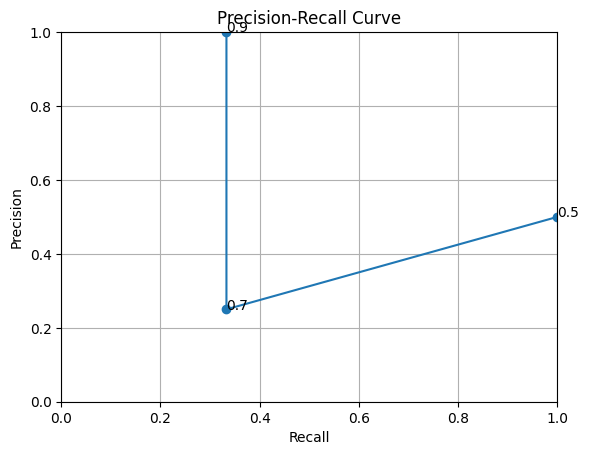

In [7]:
ed.pr_curve(results=results)